In [1]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.7.1 True
gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from cv2 import imshow

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [3]:
import matplotlib.pyplot as plt


In [4]:
import glob
from fvcore.common.file_io import PathManager
import xml.etree.ElementTree as ET
from detectron2.structures import BoxMode

In [5]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")) #Get the basic model configuration from the model zoo 
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256  
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 # No. of classes = [HINDI, ENGLISH, OTHER]


In [8]:
from detectron2.utils.visualizer import ColorMode

#Use the final weights generated after successful training for inference  
cfg.MODEL.WEIGHTS = os.path.join('/home/vicky/Documents/HUL SKU WORK/DOVE LABEL/output/model_final.pth' )

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8  # set the testing threshold for this model
#Pass the validation dataset

predictor = DefaultPredictor(cfg)


In [15]:
folder_path='/home/vicky/Documents/HUL SKU WORK/HUL SAMPLES'
output_path='/home/vicky/Documents/HUL SKU WORK/DOVE LABEL PREDICTIONS'

In [16]:
for file in os.listdir(folder_path):
    file_path=os.path.join(folder_path,file)
    im = cv2.imread(file_path)
    print(file)
    
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE   
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu")) #Passing the predictions to CPU from the GPU
    op=v.get_image()[:, :, ::-1]
    output_file=os.path.join(output_path,file)
    cv2.imwrite(output_file,op)


Hair_GT (7).jpeg
image24.jpeg
Hair_GT (13).jpeg
IMG-20201103-WA0188.jpg
Hair_GT (19).jpeg
IMG-20201103-WA0220.jpg
Hair_GT (10).jpeg
IMG-20201103-WA0193.jpg
Hair_GT (22).jpeg
IMG-20201103-WA0186.jpg
Average_HUL-113293D-SA13.jpg
IMG-20201008-WA0003.jpg
IMG-20201103-WA0201.jpg
IMG-20201103-WA0222.jpg
image113.jpeg
IMG-20201103-WA0218.jpg
IMG-20201103-WA0206.jpg
IMG-20201103-WA0197.jpg
Hair_GT (17).jpeg
Hair_GT (21).jpeg
Hair_GT (14).jpeg
IMG-20201103-WA0200.jpg
IMG-20201103-WA0184.jpg
Hair_GT (12).jpeg
image20.jpeg
Hair_GT (4).jpeg
Hair_GT (9).jpeg
IMG-20201103-WA0195.jpg
IMG-20201103-WA0176.jpg
Hair_GT (6).jpeg
Hair_GT (11).jpeg
Hair_GT (1).jpeg
IMG-20201103-WA0211.jpg
Hair_GT (16).jpeg
Hair_GT (18).jpeg
Hair_GT (5).jpeg
Average_HUL-113293D-C122.jpg
Hair_GT (15).jpeg
IMG-20201008-WA0013 (1).jpg
Average_HUL-103001D-A0300.jpg
IMG-20201103-WA0185.jpg
Hair_GT (8).jpeg
Hair_GT (2).jpeg
Hair_GT (20).jpeg
Hair_GT (3).jpeg


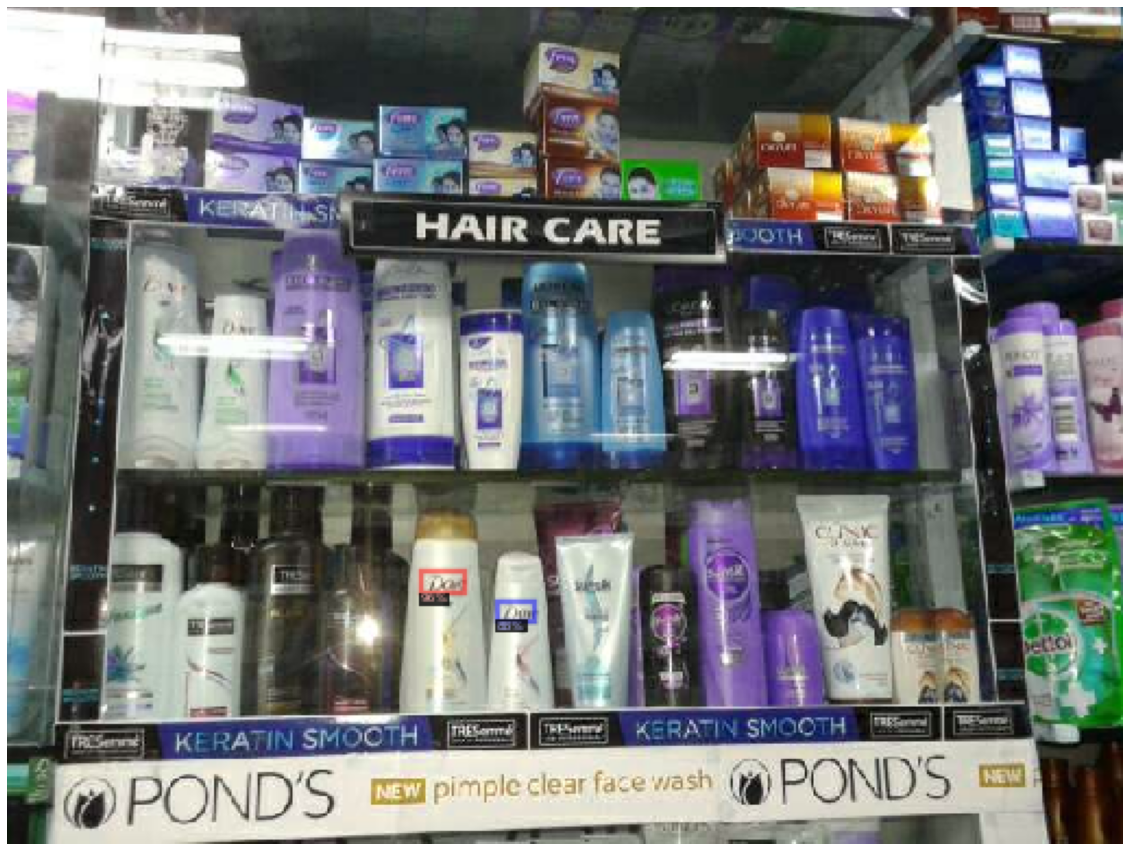

In [12]:
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(op)
plt.show()